In [ ]:
!pip install tensorflow
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

!pip install pydicom
!pip install pascal-voc-tools
!pip install pydicom
!pip install pascal-voc-tools
!pip install pascal_voc_tools
!pip install shap
!pip install lime
!pip install --upgrade tensorflow keras

In [2]:
### USING SVM's HOG feature without AUGEMNTING THE IMAGES

In [2]:
import os
import numpy as np
import cv2
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage import io, color
from skimage import transform

def extract_hog_features(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize image to 64x64 pixels
    resized = transform.resize(gray, (64, 64))

    # Extract HOG features with parameters (orientations, pixels_per_cell, cells_per_block)
    features = hog(resized, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')

    return features

def load_dataset(path):
    # Create empty lists to store features and labels
    X, y = [], []

    # Loop through each cropped image file in the specified path for 'yes' class
    for file in os.listdir(os.path.join(path, 'YESfinal', 'YEScropped')):
        if file.endswith('.png'):
            # Read the image file
            image = cv2.imread(os.path.join(path, 'YESfinal', 'YEScropped', file))

            # Extract HOG features from the image
            features = extract_hog_features(image)

            # Append features and label to the lists
            X.append(features)
            y.append(1)

    # Loop through each cropped image file in the specified path for 'no' class
    for file in os.listdir(os.path.join(path, 'NOfinal', 'NOcropped')):
        if file.endswith('.png'):
            # Read the image file
            image = cv2.imread(os.path.join(path, 'NOfinal', 'NOcropped', file))

            # Extract HOG features from the image
            features = extract_hog_features(image)

            # Append features and label to the lists
            X.append(features)
            y.append(0)

    return X, y

def train_classifier(X, y):
    # Split dataset into training and testing sets with 80% for training and 20% for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a support vector machine classifier with a radial basis function kernel
    clf = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
    clf.fit(X_train, y_train)

    # Predict labels for test set
    y_pred = clf.predict(X_test)

    # Print accuracy score
    print("Accuracy:", accuracy_score(y_test, y_pred))

    return clf

def detect_lung_cancer(path, clf):
    # Loop through each image file in the specified path
    for file in os.listdir(path):
        if file.endswith('.png'):
            # Read the image file
            image = io.imread(os.path.join(path, file))

            # Extract HOG features from the image
            features = extract_hog_features(image)

            # Predict label for the image
            prob = clf.predict_proba([features])[0][1]

            # Print prediction result and probability
            print(file, 'Cancer Probability:', prob)
            
# Path to the folder containing the lung images
path = 'C:/New Volume D/LUNG PROJECT/Fused-All'

# Load dataset
X, y = load_dataset(path)

# Train classifier
clf = train_classifier(X, y)

# Detect lung cancer
detect_lung_cancer(path, clf)


Accuracy: 0.7349397590361446
10.png Cancer Probability: 0.17338894555613954
100.png Cancer Probability: 0.2037684670487829
101.png Cancer Probability: 0.16809132312347358
102.png Cancer Probability: 0.21271113272121528
103.png Cancer Probability: 0.11567674746244394
104.png Cancer Probability: 0.11604015469710996
105.png Cancer Probability: 0.10447760097948827
106.png Cancer Probability: 0.12635853904475997
107.png Cancer Probability: 0.12595593652224105
108.png Cancer Probability: 0.12455082465072964
109.png Cancer Probability: 0.1078051631920726
11.png Cancer Probability: 0.1671093288188236
110.png Cancer Probability: 0.09695034161415288
111.png Cancer Probability: 0.13064341041006447
112.png Cancer Probability: 0.08989828428273025
113.png Cancer Probability: 0.09039124467270478
114.png Cancer Probability: 0.06763499445721986
115.png Cancer Probability: 0.06126282396063078
116.png Cancer Probability: 0.06106565879572938
117.png Cancer Probability: 0.04609483579111871
118.png Cancer P

26.png Cancer Probability: 0.3012102366728071
260.png Cancer Probability: 0.11534021209437165
261.png Cancer Probability: 0.09387862054317091
262.png Cancer Probability: 0.13176464586667325
263.png Cancer Probability: 0.1347154781072678
264.png Cancer Probability: 0.1511197445711451
265.png Cancer Probability: 0.17166259530631633
266.png Cancer Probability: 0.1099784591927736
267.png Cancer Probability: 0.1107293499564454
268.png Cancer Probability: 0.15109122862446608
269.png Cancer Probability: 0.09355712375093926
27.png Cancer Probability: 0.046952974922964255
270.png Cancer Probability: 0.10108139017169361
271.png Cancer Probability: 0.05249599858112614
272.png Cancer Probability: 0.06073659744659722
273.png Cancer Probability: 0.1310931707635014
274.png Cancer Probability: 0.09857197567764354
275.png Cancer Probability: 0.19387157277785022
276.png Cancer Probability: 0.18206169729977084
277.png Cancer Probability: 0.3179181988012961
278.png Cancer Probability: 0.675214475114542
27

45.png Cancer Probability: 0.1833440682934595
46.png Cancer Probability: 0.14055097580350243
47.png Cancer Probability: 0.17473389493237979
48.png Cancer Probability: 0.1879833630124699
49.png Cancer Probability: 0.11909493323164223
5.png Cancer Probability: 0.1206235596811472
50.png Cancer Probability: 0.1208826941663187
51.png Cancer Probability: 0.10056240657449698
52.png Cancer Probability: 0.0851572832774458
53.png Cancer Probability: 0.05462944656516804
54.png Cancer Probability: 0.0713783995502365
55.png Cancer Probability: 0.039697089706392394
56.png Cancer Probability: 0.09864030647661552
57.png Cancer Probability: 0.13017554795703468
58.png Cancer Probability: 0.06949404756879836
59.png Cancer Probability: 0.04664196776136337
6.png Cancer Probability: 0.17738188459065732
60.png Cancer Probability: 0.03592200171299396
61.png Cancer Probability: 0.03170614499124901
62.png Cancer Probability: 0.11128174727727269
63.png Cancer Probability: 0.1370603173389947
64.png Cancer Probabi

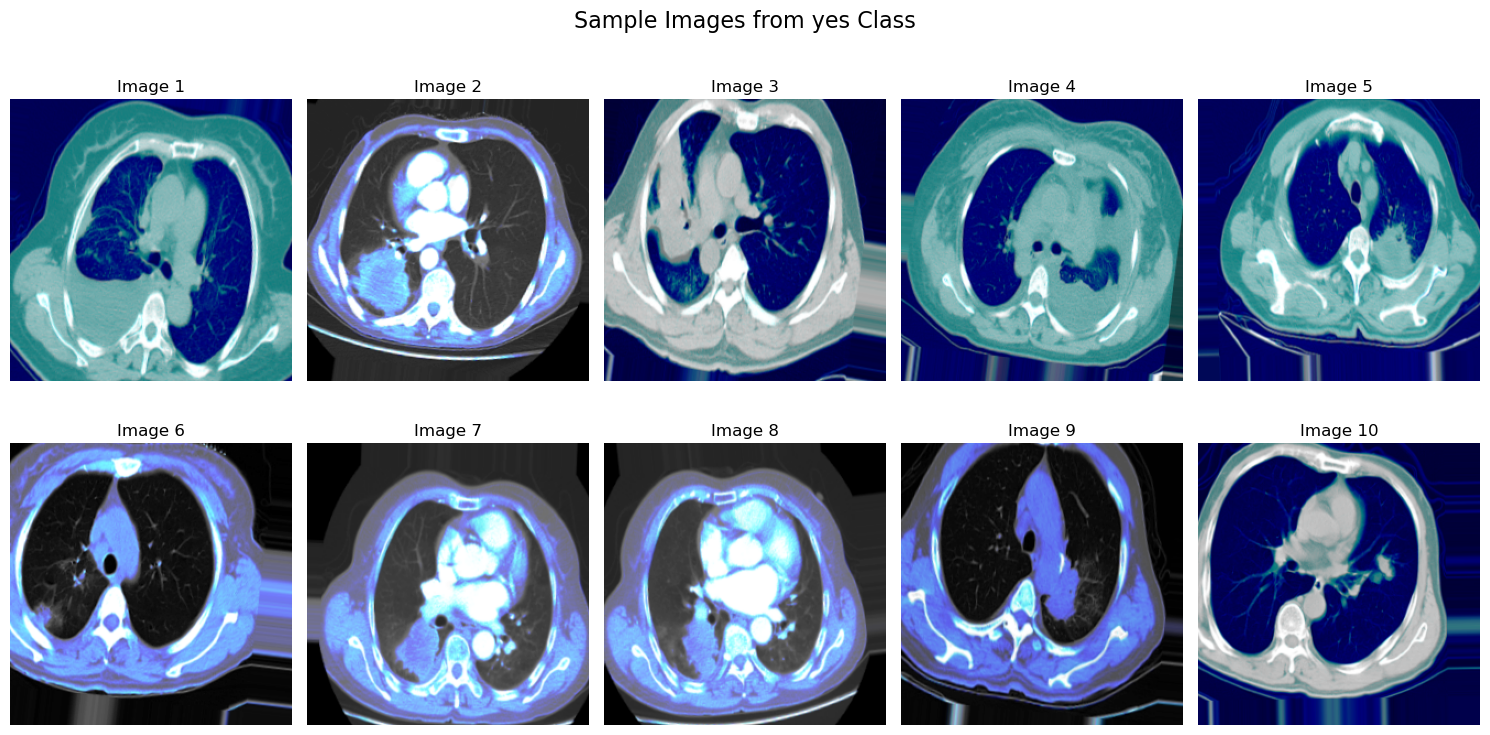

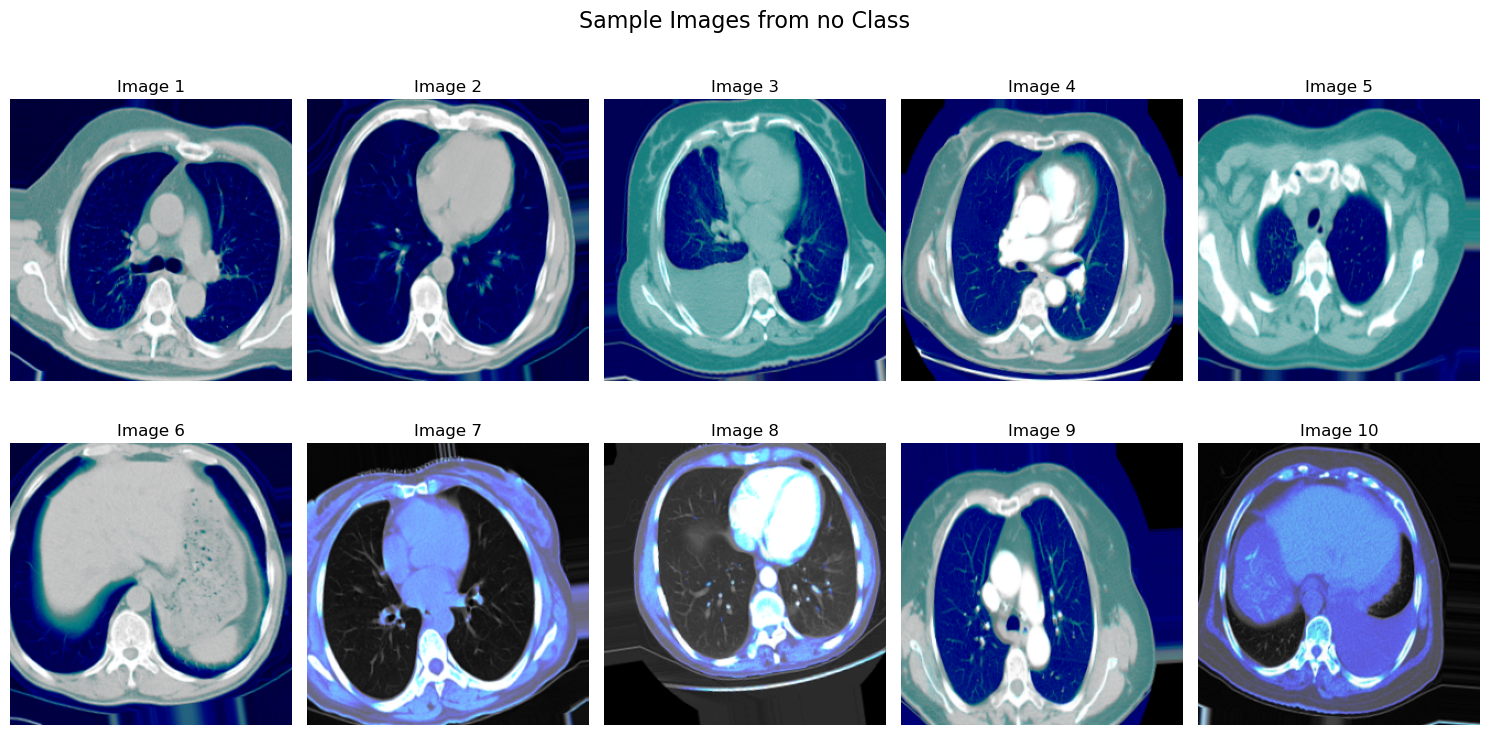

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing the lung images
path = 'C:/New Volume D/LUNG PROJECT/Fused-All'

# Augmented data directories for 'yes' and 'no' classes
augmented_yes = os.path.join(path, 'YESfinal','YEScropped', 'YES_augmented')
augmented_no = os.path.join(path, 'NOfinal','NOcropped', 'NO_augmented')

def plot_sample_images(directory, class_name, num_images=10):
    image_files = os.listdir(directory)
    selected_files = np.random.choice(image_files, num_images, replace=False)

    plt.figure(figsize=(15, 8))
    plt.suptitle(f'Sample Images from {class_name} Class', fontsize=16)
    
    for i, filename in enumerate(selected_files):
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        plt.subplot(2, 5, i + 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f'Image {i + 1}')
    
    plt.tight_layout()
    plt.show()

# Plot 10 sample images from 'yes' class
plot_sample_images(augmented_yes, 'yes', num_images=10)

# Plot 10 sample images from 'no' class
plot_sample_images(augmented_no, 'no', num_images=10)


In [3]:
### SVM's HOG FEATURE ON ONLY CROPPED & NON-AUGMENTED IMAGES

In [5]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from skimage import io, color
from skimage import transform

# Define a function to extract HOG features
def extract_hog_features(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize image to 64x64 pixels
    resized = transform.resize(gray, (64, 64))
    # Extract HOG features with parameters (orientations, pixels_per_cell, cells_per_block)
    features = hog(resized, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
    return features

# Define a function to load the dataset from a specified path
def load_dataset(path):
    # Create empty lists to store features and labels
    X, y = [], []
    # Loop through each cropped image file in the specified path for 'yes' class
    for file in os.listdir(os.path.join(path, 'YESfinal', 'YEScropped')):
        if file.endswith('.png'):
            # Read the image file
            image = cv2.imread(os.path.join(path, 'YESfinal', 'YEScropped', file))
            # Extract HOG features from the image
            features = extract_hog_features(image)
            # Append features and label to the lists
            X.append(features)
            y.append(1)

    # Loop through each cropped image file in the specified path for 'no' class
    for file in os.listdir(os.path.join(path, 'NOfinal', 'NOcropped')):
        if file.endswith('.png'):
            # Read the image file
            image = cv2.imread(os.path.join(path, 'NOfinal', 'NOcropped', file))
            # Extract HOG features from the image
            features = extract_hog_features(image)
            # Append features and label to the lists
            X.append(features)
            y.append(0)
    return X, y
# Define a function to train the classifier and return it
def train_classifier(X, y):
    # Train a support vector machine classifier with a radial basis function kernel
    clf = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
    clf.fit(X, y)
    return clf
# Define a function to detect lung cancer and output the probabilities
def detect_lung_cancer(path, clf):
    # Loop through each image file in the specified path for 'yes' class
    for file in os.listdir(os.path.join(path, 'YESfinal', 'YEScropped')):
        if file.endswith('.png'):
            # Read the image file
            image = cv2.imread(os.path.join(path, 'YESfinal', 'YEScropped', file))
            # Extract HOG features from the image
            features = extract_hog_features(image)
            # Predict label for the image
            prob = clf.predict_proba([features])[0][1]
            # Print prediction result and probability for 'yes' class
            print(os.path.join('YESfinal', 'YEScropped', file), 'Cancer Probability (YES):', prob)
    # Loop through each image file in the specified path for 'no' class
    for file in os.listdir(os.path.join(path, 'NOfinal', 'NOcropped')):
        if file.endswith('.png'):
            # Read the image file
            image = cv2.imread(os.path.join(path, 'NOfinal', 'NOcropped', file))
            # Extract HOG features from the image
            features = extract_hog_features(image)
            # Predict label for the image
            prob = clf.predict_proba([features])[0][1]
            # Print prediction result and probability for 'no' class
            print(os.path.join('NOfinal', 'NOcropped', file), 'Cancer Probability (NO):', prob)
# Path to the folder containing the lung images
path = 'C:/New Volume D/LUNG PROJECT/Fused-All'
# Load dataset
X, y = load_dataset(path)
# Train classifier
clf = train_classifier(X, y)
# Detect lung cancer and output probabilities separately for 'yes' and 'no' classes
detect_lung_cancer(path, clf)


YESfinal\YEScropped\c102.png Cancer Probability (YES): 0.16734848900511234
YESfinal\YEScropped\c124.png Cancer Probability (YES): 0.940921855462935
YESfinal\YEScropped\c125.png Cancer Probability (YES): 0.9409146423359968
YESfinal\YEScropped\c126.png Cancer Probability (YES): 0.9408210228922931
YESfinal\YEScropped\c127.png Cancer Probability (YES): 0.9358595996165975
YESfinal\YEScropped\c128.png Cancer Probability (YES): 0.9408902270357832
YESfinal\YEScropped\c148.png Cancer Probability (YES): 0.7194912818967081
YESfinal\YEScropped\c149.png Cancer Probability (YES): 0.7701671113220468
YESfinal\YEScropped\c16.png Cancer Probability (YES): 0.8999545919714038
YESfinal\YEScropped\c162.png Cancer Probability (YES): 0.9291774877005838
YESfinal\YEScropped\c163.png Cancer Probability (YES): 0.9408950455820188
YESfinal\YEScropped\c164.png Cancer Probability (YES): 0.9252246325871567
YESfinal\YEScropped\c165.png Cancer Probability (YES): 0.7723081459730738
YESfinal\YEScropped\c17.png Cancer Prob

YESfinal\YEScropped\c408.png Cancer Probability (YES): 0.7911987644996573
YESfinal\YEScropped\c41.png Cancer Probability (YES): 0.851881566582344
YESfinal\YEScropped\c412.png Cancer Probability (YES): 0.8822966938738618
YESfinal\YEScropped\c413.png Cancer Probability (YES): 0.9409044021187994
YESfinal\YEScropped\c414.png Cancer Probability (YES): 0.9444262528880839
YESfinal\YEScropped\c415.png Cancer Probability (YES): 0.8396107345403472
YESfinal\YEScropped\c416.png Cancer Probability (YES): 0.8427614660413997
YESfinal\YEScropped\c42.png Cancer Probability (YES): 0.9252381429940095
YESfinal\YEScropped\c43.png Cancer Probability (YES): 0.9408532177882739
YESfinal\YEScropped\c44.png Cancer Probability (YES): 0.8727212837063807
YESfinal\YEScropped\c72.png Cancer Probability (YES): 0.4706657456319917
YESfinal\YEScropped\c73.png Cancer Probability (YES): 0.9409108960816939
YESfinal\YEScropped\c74.png Cancer Probability (YES): 0.9409115564438228
YESfinal\YEScropped\c75.png Cancer Probability

NOfinal\NOcropped\c213.png Cancer Probability (NO): 0.08195512766549924
NOfinal\NOcropped\c214.png Cancer Probability (NO): 0.08206192402908111
NOfinal\NOcropped\c215.png Cancer Probability (NO): 0.0737092986052689
NOfinal\NOcropped\c216.png Cancer Probability (NO): 0.08160218438317357
NOfinal\NOcropped\c217.png Cancer Probability (NO): 0.16301956017016409
NOfinal\NOcropped\c22.png Cancer Probability (NO): 0.0777398038388166
NOfinal\NOcropped\c222.png Cancer Probability (NO): 0.4631512246894042
NOfinal\NOcropped\c223.png Cancer Probability (NO): 0.4366776388725519
NOfinal\NOcropped\c224.png Cancer Probability (NO): 0.4872124151081328
NOfinal\NOcropped\c23.png Cancer Probability (NO): 0.08205525923746132
NOfinal\NOcropped\c233.png Cancer Probability (NO): 0.13233379301364107
NOfinal\NOcropped\c234.png Cancer Probability (NO): 0.18515993638914294
NOfinal\NOcropped\c235.png Cancer Probability (NO): 0.08197397610185976
NOfinal\NOcropped\c237.png Cancer Probability (NO): 0.06031919945451441

NOfinal\NOcropped\c400.png Cancer Probability (NO): 0.10902123342959288
NOfinal\NOcropped\c403.png Cancer Probability (NO): 0.08209377481452046
NOfinal\NOcropped\c404.png Cancer Probability (NO): 0.08197624096335607
NOfinal\NOcropped\c409.png Cancer Probability (NO): 0.08206543443077756
NOfinal\NOcropped\c410.png Cancer Probability (NO): 0.08204361863401752
NOfinal\NOcropped\c411.png Cancer Probability (NO): 0.08211535570332484
NOfinal\NOcropped\c417.png Cancer Probability (NO): 0.08211909107773421
NOfinal\NOcropped\c45.png Cancer Probability (NO): 0.16062605219756074
NOfinal\NOcropped\c46.png Cancer Probability (NO): 0.11738925923613173
NOfinal\NOcropped\c47.png Cancer Probability (NO): 0.09634674934195296
NOfinal\NOcropped\c48.png Cancer Probability (NO): 0.09129663136392704
NOfinal\NOcropped\c49.png Cancer Probability (NO): 0.061520897661506826
NOfinal\NOcropped\c5.png Cancer Probability (NO): 0.06517877215568481
NOfinal\NOcropped\c50.png Cancer Probability (NO): 0.06321534696329467

In [6]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from skimage import io, color, transform
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def load_and_split_dataset(path, test_size=0.2, random_state=42):
    # Create empty lists to store features and labels
    X, y = [], []

    # Loop through each cropped image file in the specified path for 'yes' class
    for file in os.listdir(os.path.join(path, 'YESfinal', 'YEScropped')):
        if file.endswith('.png'):
            # Read the image file
            image = cv2.imread(os.path.join(path, 'YESfinal', 'YEScropped', file))

            # Extract HOG features from the image
            features = extract_hog_features(image)

            # Append features and label to the lists
            X.append(features)
            y.append(1)

    # Loop through each cropped image file in the specified path for 'no' class
    for file in os.listdir(os.path.join(path, 'NOfinal', 'NOcropped')):
        if file.endswith('.png'):
            # Read the image file
            image = cv2.imread(os.path.join(path, 'NOfinal', 'NOcropped', file))

            # Extract HOG features from the image
            features = extract_hog_features(image)

            # Append features and label to the lists
            X.append(features)
            y.append(0)

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

# Load and split the dataset into training and test sets
X_train, X_test, y_train, y_test = load_and_split_dataset(path)

# Train classifier on the training set
clf = train_classifier(X_train, y_train)

# Predict labels on the test set
y_pred = clf.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7349397590361446


In [7]:

import os
import cv2
import numpy as np
from sklearn.utils import shuffle

def load_data(dir_list, image_size):
    """
    Read images, resize, and normalize them.
    Arguments:
        dir_list: list of strings representing file directories.
        image_size: tuple specifying the target image size (width, height).
    Returns:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """

    X = []
    y = []
    image_width, image_height = image_size
    
    for directory in dir_list:
        for filename in os.listdir(directory):
            if filename.endswith('.png'):
                # Read the image
                image = cv2.imread(os.path.join(directory, filename))
                # Convert image to grayscale
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                # Resize image
                resized = cv2.resize(gray, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
                # Normalize values
                normalized = resized / 255.0
                # Convert image to numpy array and append it to X
                X.append(normalized)
                # Append a value of 1 to the target array if the image
                # is in the 'yes' class folder, otherwise append 0.
                if 'yes' in directory:
                    y.append([1])
                else:
                    y.append([0])
                
    X = np.array(X)
    y = np.array(y)
    
    # Shuffle the data
    X, y = shuffle(X, y)
    
    print(f'Number of examples: {len(X)}')
    print(f'X shape: {X.shape}')
    print(f'y shape: {y.shape}')
    
    return X, y

# Path to the folder containing the lung images
path = 'C:/New Volume D/LUNG PROJECT/Fused-All'

# Augmented data directories for 'yes' and 'no' classes
augmented_yes = os.path.join(path, 'YESfinal', 'YEScropped')
augmented_no = os.path.join(path, 'NOfinal', 'NOcropped')

IMG_WIDTH, IMG_HEIGHT = (240, 240)

# Load data
X, y = load_data([augmented_yes, augmented_no], (IMG_WIDTH, IMG_HEIGHT))


Number of examples: 413
X shape: (413, 240, 240)
y shape: (413, 1)


In [8]:
from sklearn.model_selection import train_test_split

def split_data(X, y, test_size=0.2):
    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=test_size)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

# Assuming you have already loaded the data into X and y variables

# Split the data
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, test_size=0.2)

# Print the shapes of the resulting sets
print("Training set shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}\n")

print("Validation set shapes:")
print(f"X_val: {X_val.shape}")
print(f"y_val: {y_val.shape}\n")

print("Test set shapes:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")


Training set shapes:
X_train: (330, 240, 240)
y_train: (330, 1)

Validation set shapes:
X_val: (42, 240, 240)
y_val: (42, 1)

Test set shapes:
X_test: (41, 240, 240)
y_test: (41, 1)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np

def split_data(X, y, test_size=0.2):
    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=test_size)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

# Assuming you have already loaded the data into X and y variables

# Split the data
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, test_size=0.3)

# Print the number of examples and shapes of the resulting sets
print("number of training examples = " + str(X_train.shape[0]))
print("number of development examples = " + str(X_val.shape[0]))
print("number of test examples = " + str(X_test.shape[0]))
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(y_train.shape))
print("X_val (dev) shape: " + str(X_val.shape))
print("Y_val (dev) shape: " + str(y_val.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(y_test.shape))

def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{round(s, 1)}"

def compute_f1_score(y_true, prob):
    y_pred = np.where(prob > 0.5, 1, 0)
    score = f1_score(y_true, y_pred)
    return score


number of training examples = 289
number of development examples = 62
number of test examples = 62
X_train shape: (289, 240, 240)
Y_train shape: (289, 1)
X_val (dev) shape: (62, 240, 240)
Y_val (dev) shape: (62, 1)
X_test shape: (62, 240, 240)
Y_test shape: (62, 1)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
from tensorflow.keras.layers import Input, ZeroPadding2D, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

def build_model(input_shape):
    """
    Arguments:
        input_shape: A tuple representing the shape of the input of the model. shape=(image_width, image_height, #_channels)
    Returns:
        model: A Model object.
    """
    # Define the input placeholder as a tensor with shape input_shape. 
    X_input = Input(input_shape) # shape=(?, 240, 240, 3)
    
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((2, 2))(X_input) # shape=(?, 244, 244, 3)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X) # shape=(?, 238, 238, 32)
    
    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool0')(X) # shape=(?, 59, 59, 32) 
    
    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool1')(X) # shape=(?, 14, 14, 32)
    
    # FLATTEN X 
    X = Flatten()(X) # shape=(?, 6272)
    # FULLYCONNECTED
    X = Dense(1, activation='sigmoid', name='fc')(X) # shape=(?, 1)
    
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs=X_input, outputs=X, name='LungDetectionModel')
    
    return model

def split_data(X, y, test_size=0.2):
    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=test_size)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

# Assuming you have already loaded the data into X and y variables

# Split the data
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, test_size=0.3)

# # Print the number of examples and shapes of the resulting sets
# print("number of training examples = %d" % X_train.shape[0])
# print("number of development examples = %d" % X_val.shape[0])
# print("number of test examples = %d" % X_test.shape[0])
# print("X_train shape: %s" % str(X_train.shape))
# print("Y_train shape: %s" % str(y_train.shape))
# print("X_val (dev) shape: %s" % str(X_val.shape))
# print("Y_val (dev) shape: %s" % str(y_val.shape))
# print("X_test shape: %s" % str(X_test.shape))
# print("Y_test shape: %s" % str(y_test.shape))

def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "%d:%d:%.1f" % (h, m, round(s, 1))

def compute_f1_score(y_true, prob):
    y_pred = np.where(prob > 0.5, 1, 0)
    score = f1_score(y_true, y_pred)
    return score

IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)
model = build_model(IMG_SHAPE)
model.summary()


Model: "LungDetectionModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d (ZeroPadding2D)  │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv0 (Conv2D)                  │ (None, 238, 238, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn0 (BatchNormalization)        │ (None, 238, 238, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 238, 238, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool0 (MaxPooling2D)        │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool1 (MaxPooling2D)        │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc (Dense)                      │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,137 (43.50 KB)

 Trainable params: 11,073 (43.25 KB)

 Non-trainable params: 64 (256.00 B)

In [12]:
### MODEL TRAINING  BEGINS FROM HERE, YOUR LAPTOP WILL HEAT UP SO TAKE CARE

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
from tensorflow.keras.layers import Input, ZeroPadding2D, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

def build_model(input_shape):
    """
    Arguments:
        input_shape: A tuple representing the shape of the input of the model. shape=(image_width, image_height, #_channels)
    Returns:
        model: A Model object.
    """
    # Define the input placeholder as a tensor with shape input_shape. 
    X_input = Input(input_shape) # shape=(?, 240, 240, 3)
    
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((2, 2))(X_input) # shape=(?, 244, 244, 3)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X) # shape=(?, 238, 238, 32)
    
    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool0')(X) # shape=(?, 59, 59, 32) 
    
    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool1')(X) # shape=(?, 14, 14, 32)
    
    # FLATTEN X 
    X = Flatten()(X) # shape=(?, 6272)
    # FULLYCONNECTED
    X = Dense(1, activation='sigmoid', name='fc')(X) # shape=(?, 1)
    
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs=X_input, outputs=X, name='LungDetectionModel')
    
    return model

def split_data(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

# Assuming you have already loaded the data into X and y variables

# Split the data
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.3)

# Print the number of examples and shapes of the resulting sets
print("Number of training examples = %d" % X_train.shape[0])
print("Number of test examples = %d" % X_test.shape[0])
print("X_train shape: %s" % str(X_train.shape))
print("Y_train shape: %s" % str(y_train.shape))
print("X_test shape: %s" % str(X_test.shape))
print("Y_test shape: %s" % str(y_test.shape))

# Build the model
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 1)
model = build_model(IMG_SHAPE)
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryCrossentropy(), metrics=['accuracy'])


Number of training examples = 289
Number of test examples = 124
X_train shape: (289, 240, 240)
Y_train shape: (289, 1)
X_test shape: (124, 240, 240)
Y_test shape: (124, 1)


Model: "LungDetectionModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 240, 240, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_1                │ (None, 244, 244, 1)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv0 (Conv2D)                  │ (None, 238, 238, 32)   │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn0 (BatchNormalization)        │ (None, 238, 238, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 238, 238, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool0 (MaxPooling2D)        │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool1 (MaxPooling2D)        │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc (Dense)                      │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 7,937 (31.00 KB)

 Non-trainable params: 64 (256.00 B)

In [16]:
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{round(s,1)}"

# Define the compute_f1_score function
def compute_f1_score(y_true, prob):
    # Convert the vector of probabilities to a target vector
    y_pred = np.where(prob > 0.5, 1, 0)
    
    score = f1_score(y_true, y_pred)
    
    return score

In [17]:
def build_model(input_shape):
    """
    Arguments:
        input_shape: A tuple representing the shape of the input of the model. shape=(image_width, image_height, #_channels)
    Returns:
        model: A Model object.
    """
    # Define the input placeholder as a tensor with shape input_shape. 
    X_input = Input(input_shape) # shape=(?, 240, 240, 3)
    
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((2, 2))(X_input) # shape=(?, 244, 244, 3)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X) # shape=(?, 238, 238, 32)
    
    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool0')(X) # shape=(?, 59, 59, 32) 
    
    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool1')(X) # shape=(?, 14, 14, 32)
    
    # FLATTEN X 
    X = Flatten()(X) # shape=(?, 6272)
    # FULLYCONNECTED
    X = Dense(1, activation='sigmoid', name='fc')(X) # shape=(?, 1)
    
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs=X_input, outputs=X, name='LungDetectionModel')
    
    return model

### DEFINE IMAGE SHAPE

In [18]:
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)
model = build_model(IMG_SHAPE)
model.summary()

Model: "LungDetectionModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_2                │ (None, 244, 244, 3)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv0 (Conv2D)                  │ (None, 238, 238, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn0 (BatchNormalization)        │ (None, 238, 238, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 238, 238, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool0 (MaxPooling2D)        │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool1 (MaxPooling2D)        │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc (Dense)                      │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,137 (43.50 KB)

 Trainable params: 11,073 (43.25 KB)

 Non-trainable params: 64 (256.00 B)

### COMPILE THE MODEL

In [28]:
import time

In [33]:
# Assuming you have already loaded your data into X (features) and y (labels)

# Import libraries
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define image dimensions (assuming your data is 2D images)
IMG_WIDTH, IMG_HEIGHT = (X.shape[1], X.shape[2])  # Replace with actual image width and height if known

# Split the data (80% training, 10% validation, 10% testing)
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=42)  # Set random state for reproducibility
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5)  # Split further for validation and testing

# Print shapes of the resulting sets
print("Number of training examples =", X_train.shape[0])
print("Number of validation examples =", X_val.shape[0])
print("Number of test examples =", X_test.shape[0])
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

# Preprocess data (normalize or standardize if needed)
# ... (add your data preprocessing steps here)

# Reshape data for CNN (if it's not already 4D)
X_train = X_train.reshape(X_train.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)  # Add channel dimension if grayscale
X_val = X_val.reshape(X_val.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
X_test = X_test.reshape(X_test.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Print model summary
model.summary()

# Compile the model (adjust optimizer and loss function as needed)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# TensorBoard setup
import time
log_file_name = f'lung_tumor_detection_cnn_{int(time.time())}'
tensorboard = TensorBoard(log_dir=f'logs/{log_file_name}')

# Define callbacks (optional)
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[tensorboard, early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Save the model (optional)
model.save('lung_tumor_detection_model.h5')


Number of training examples = 330
Number of validation examples = 41
Number of test examples = 42
X_train shape: (330, 240, 240)
X_val shape: (41, 240, 240)
X_test shape: (42, 240, 240)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 238, 238, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 117, 117, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 215296)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │    13,779,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,797,889 (52.63 MB)

 Trainable params: 13,797,889 (52.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 686ms/step - accuracy: 0.7642 - loss: 0.1853 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 654ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 688ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 671ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0000e+00 


Test accuracy: 1.0


In [34]:
# Define callbacks (optional)
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
model.fit(X_train, y_train, epochs=8, validation_data=(X_val, y_val), callbacks=[tensorboard, early_stopping])


Epoch 1/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 694ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 696ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 686ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 667ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [35]:
'''Test Set Performance: While the model achieves 100% accuracy on the training and validation sets, 
its performance on the unseen test set is the most important measure. Evaluate the model on the test 
set using model.evaluate(X_test, y_test) and see how well it generalizes.
accuracy: 1.0000 - loss: 0.0000e+00: This shows the model achieved perfect accuracy (1.0) and zero loss on the test set.
[0.0, 1.0] lower bound, upper bound'''

model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 0.0000e+00


[0.0, 1.0]

In [43]:
# Define a list of different model architectures
model_architectures = [
    {
        'filters': [32, 64],
        'kernel_size': [(3, 3), (3, 3)],
        'dense_units': 64
    },
    {
        'filters': [64, 128],
        'kernel_size': [(3, 3), (3, 3)],
        'dense_units': 128
    },
    # Add more architectures here
]

# Create a list to store the models and their performance
models_performance = []

# Train each model and save the results
for architecture in model_architectures:
    # Create a new model
    model = Sequential()
    model.add(Conv2D(architecture['filters'][0], architecture['kernel_size'][0], activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(architecture['filters'][1], architecture['kernel_size'][1], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(architecture['dense_units'], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test)

    # Save the model (optional)
    model.save(f'model_{architecture["filters"][0]}_{architecture["filters"][1]}.h5')
    #or -> model.save(f'path/to/save/model_{architecture["filters"][0]}_{architecture["filters"][1]}.h5')


    # Append the model and its performance to the list
    models_performance.append({
        'model': model,
        'architecture': architecture,
        'test_accuracy': test_acc
    })

# Compare the models and choose the best one
# ... (add your comparison logic here)


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 724ms/step - accuracy: 0.8048 - loss: 0.1824 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 711ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 727ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 702ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 753ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 716ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 729ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 710ms/step

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 1.0000 - loss: 0.1701 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 1.00

In [44]:
# Define a list of different model architectures
model_architectures = [
    {
        'filters': [32, 64],
        'kernel_size': [(3, 3), (3, 3)],
        'dense_units': 64
    },
    {
        'filters': [64, 128],
        'kernel_size': [(3, 3), (3, 3)],
        'dense_units': 128
    },
    # Add more architectures here
]

# Create a list to store the models and their performance
models_performance = []

# Train each model and save the results
for architecture in model_architectures:
    # Create a new model
    model = Sequential()
    model.add(Conv2D(architecture['filters'][0], architecture['kernel_size'][0], activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(architecture['filters'][1], architecture['kernel_size'][1], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(architecture['dense_units'], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test)

    # Save the model (optional)
    model.save(f'model_{architecture["filters"][0]}_{architecture["filters"][1]}.h5')
    #or -> model.save(f'path/to/save/model_{architecture["filters"][0]}_{architecture["filters"][1]}.h5')


    # Append the model and its performance to the list
    models_performance.append({
        'model': model,
        'architecture': architecture,
        'test_accuracy': test_acc
    })

# Compare the models and choose the best one
# ... (add your comparison logic here)


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 851ms/step - accuracy: 0.7398 - loss: 0.1950 - val_accuracy: 1.0000 - val_loss: 5.1845e-26
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 836ms/step - accuracy: 1.0000 - loss: 1.4183e-24 - val_accuracy: 1.0000 - val_loss: 3.9892e-33
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 848ms/step - accuracy: 1.0000 - loss: 3.8380e-31 - val_accuracy: 1.0000 - val_loss: 7.5541e-36
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 861ms/step - accuracy: 1.0000 - loss: 1.5826e-34 - val_accuracy: 1.0000 - val_loss: 7.5075e-37
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 877ms/step - accuracy: 1.0000 - loss: 8.9261e-36 - val_accuracy: 1.0000 - val_loss: 3.2963e-37
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 833ms/step - accuracy: 1.0000 - loss: 4.2199e-36 - val_accuracy: 1.0000 - val_loss: 2.4750e-37
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 828ms/step - accuracy: 1.0000 - loss: 5.7879e-36 - val_accuracy: 1.0000 - val_loss: 2.2437e-37
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 804ms/st

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9593 - loss: 0.1774 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 1.00

In [47]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np

# Directory to save models
save_directory = 'C:/New Volume D/LUNG PROJECT/Fused-All/Models'

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

# Assuming you have already loaded your data into X (features) and y (labels)
# Assuming X is a 3D or 4D array (add a channel dimension if needed)
X = np.random.rand(100, 28, 28)  # Replace with your actual data
y = np.random.randint(0, 2, size=(100,))  # Replace with your actual labels

# Define image dimensions
IMG_WIDTH, IMG_HEIGHT = (28, 28)  # Replace with your actual dimensions

# Split data into train, validation, and test sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5)

# Reshape data for CNN if not already 4D
X_train = X_train.reshape(X_train.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
X_val = X_val.reshape(X_val.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
X_test = X_test.reshape(X_test.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)

# Define a list of different model architectures
model_architectures = [
    {
        'filters': [32, 64],
        'kernel_size': [(3, 3), (3, 3)],
        'dense_units': 64
    },
    {
        'filters': [64, 128],
        'kernel_size': [(3, 3), (3, 3)],
        'dense_units': 128
    },
    # Add more architectures here
]

# Create a list to store the models and their performance
models_performance = []

# Train each model and save the results
for architecture in model_architectures:
    # Create a new model
    model = Sequential()
    model.add(Conv2D(architecture['filters'][0], architecture['kernel_size'][0], activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(architecture['filters'][1], architecture['kernel_size'][1], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(architecture['dense_units'], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test)

    # Save the model to the specified directory
    model_filename = f'model_{architecture["filters"][0]}_{architecture["filters"][1]}_{architecture["dense_units"]}.h5'
    model_save_path = os.path.join(save_directory, model_filename)
    model.save(model_save_path)

    # Append the model and its performance to the list
    models_performance.append({
        'model': model,
        'architecture': architecture,
        'test_accuracy': test_acc
    })

# Compare the models and choose the best one
# Add your comparison logic here

print("Models saved in:", save_directory)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.6086 - loss: 0.6829 - val_accuracy: 0.5000 - val_loss: 0.7166
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5930 - loss: 0.6738 - val_accuracy: 0.5000 - val_loss: 0.6997
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6086 - loss: 0.6657 - val_accuracy: 0.5000 - val_loss: 0.7186
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6242 - loss: 0.6530 - val_accuracy: 0.5000 - val_loss: 0.7196
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6125 - loss: 0.6498 - val_accuracy: 0.5000 - val_loss: 0.7046
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7000 - loss: 0.6440


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.4164 - loss: 0.7145 - val_accuracy: 0.5000 - val_loss: 0.7026
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5813 - loss: 0.6851 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5734 - loss: 0.6788 - val_accuracy: 0.5000 - val_loss: 0.7173
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6242 - loss: 0.6664 - val_accuracy: 0.5000 - val_loss: 0.7479
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6164 - loss: 0.6621 - val_accuracy: 0.5000 - val_loss: 0.7141
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7000 - loss: 0.6303


Models saved in: C:/New Volume D/LUNG PROJECT/Fused-All/Models


In [ ]:
# I think the proper one starts from here 

Number of training examples = 80
Number of validation examples = 10
Number of test examples = 10
Epoch 1/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5000 - loss: 0.6942
Epoch 1: val_accuracy improved from -inf to 0.60000, saving model to C:/New Volume D/LUNG PROJECT/Fused-All/model17april\model_32_64_best.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.5469 - loss: 0.6851 - val_accuracy: 0.6000 - val_loss: 0.6765
Epoch 2/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5312 - loss: 0.7174
Epoch 2: val_accuracy did not improve from 0.60000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5813 - loss: 0.6875 - val_accuracy: 0.6000 - val_loss: 0.6713
Epoch 3/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.6972
Epoch 3: val_accuracy did not improve from 0.60000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5734 - loss: 0.6776 - val_accuracy: 0.6000 - val_loss: 0.6701
Epoch 4/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6875

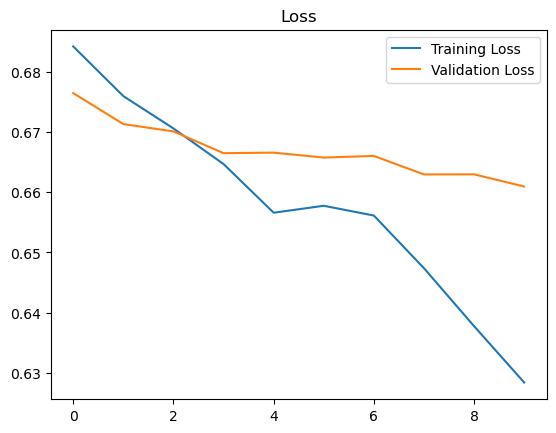

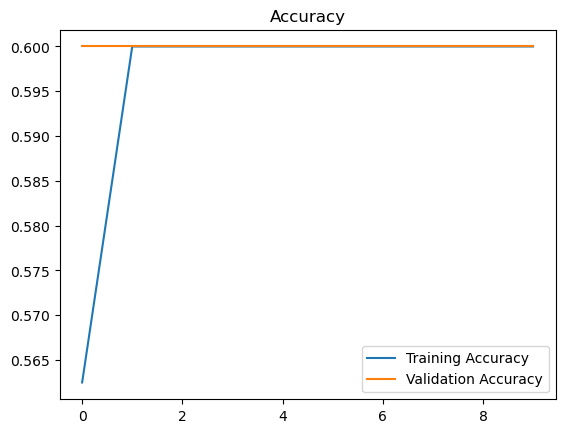

In [55]:
# Import necessary libraries
import os
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

# Assuming X (features) and y (labels) are already loaded
# Define the save directory
save_directory = 'C:/New Volume D/LUNG PROJECT/Fused-All/model17april'

# Define image dimensions (assuming your data is 2D images)
IMG_WIDTH, IMG_HEIGHT = (X.shape[1], X.shape[2])  # Replace with actual image width and height

# Split the data (80% training, 10% validation, 10% testing)
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

# Print shapes of the resulting sets
print("Number of training examples =", X_train.shape[0])
print("Number of validation examples =", X_val.shape[0])
print("Number of test examples =", X_test.shape[0])

# Preprocess data (normalize or standardize if needed)
# Add your data preprocessing steps here

# Reshape data for CNN (if it's not already 4D)
X_train = X_train.reshape(X_train.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
X_val = X_val.reshape(X_val.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
X_test = X_test.reshape(X_test.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)

# Define a list of different model architectures
model_architectures = [
    {
        'filters': [32, 64],
        'kernel_size': [(3, 3), (3, 3)],
        'dense_units': 64
    },
    {
        'filters': [64, 128],
        'kernel_size': [(3, 3), (3, 3)],
        'dense_units': 128
    },
    # Add more architectures here if desired
]

# Create a list to store the models and their performance
models_performance = []

# Train each model and save the results
for architecture in model_architectures:
    # Create a new model
    model = Sequential()
    model.add(Conv2D(architecture['filters'][0], architecture['kernel_size'][0], activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(architecture['filters'][1], architecture['kernel_size'][1], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(architecture['dense_units'], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define the ModelCheckpoint callback to save the best model based on validation accuracy
    checkpoint_filename = f"model_{architecture['filters'][0]}_{architecture['filters'][1]}_best.keras"
    checkpoint_path = os.path.join(save_directory, checkpoint_filename)
    checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

    # Define the TensorBoard callback for logging
    log_file_name = f'lung_tumor_detection_cnn_{int(time.time())}'
    tensorboard = TensorBoard(log_dir=f'logs/{log_file_name}')

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[tensorboard, checkpoint, early_stopping])

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f'Test accuracy for model with filters {architecture["filters"]}: {test_acc}')

    # Append the model and its performance to the list
    models_performance.append({
        'model': model,
        'architecture': architecture,
        'test_accuracy': test_acc,
        'history': history
    })

# Compare the models and choose the best one
# Add your comparison logic here

# Example of loading the best model based on the architecture with the highest test accuracy
best_architecture = max(models_performance, key=lambda x: x['test_accuracy'])

best_model_path = os.path.join(save_directory, f"model_{best_architecture['architecture']['filters'][0]}_{best_architecture['architecture']['filters'][1]}_best.keras")
best_model = load_model(best_model_path)

# Evaluate the best model on the test set
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Best model's test loss: {loss}")
print(f"Best model's test accuracy: {accuracy}")

# Plotting utility functions (loss and accuracy over epochs)
def plot_metrics(history):
    # Plotting training and validation loss
    plt.figure()
    try:
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss')
        plt.legend()
        plt.show()
    except KeyError:
        print("Loss metrics not available in history.")

    # Plotting training and validation accuracy
    plt.figure()
    try:
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy')
        plt.legend()
        plt.show()
    except KeyError:
        print("Accuracy metrics not available in history.")

# Example: Plotting metrics for the best model's training history
plot_metrics(best_architecture['history'])


In [ ]:
#  results showing the best model's test loss of 0.68099 and test accuracy of 60% ^

In [56]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Assuming X (features) and y (labels) are already loaded

# Set the save directory
save_directory = 'C:/New Volume D/LUNG PROJECT/Fused-All/model17april'

# Define image dimensions (assuming your data is 2D images)
IMG_WIDTH, IMG_HEIGHT = (X.shape[1], X.shape[2])  # Replace with actual image width and height

# Split the data (80% training, 10% validation, 10% testing)
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

# Print shapes of the resulting sets
print("Number of training examples =", X_train.shape[0])
print("Number of validation examples =", X_val.shape[0])
print("Number of test examples =", X_test.shape[0])

# Preprocess data (normalize or standardize if needed)
# Add your data preprocessing steps here

# Reshape data for CNN (if it's not already 4D)
X_train = X_train.reshape(X_train.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
X_val = X_val.reshape(X_val.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
X_test = X_test.reshape(X_test.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)

# Hyperparameter tuning: Define different hyperparameters for experimentation
filter_combinations = [
    {'filters': [32, 64], 'kernel_size': [(3, 3), (3, 3)], 'dense_units': 64},
    {'filters': [64, 128], 'kernel_size': [(3, 3), (3, 3)], 'dense_units': 128},
    # Add more combinations of filters, kernel sizes, and dense units as desired
]

# Define regularization rates
l2_regularization = [0, 0.01, 0.001]

# Define learning rates
learning_rates = [0.01, 0.001, 0.0001]

# Define batch sizes
batch_sizes = [16, 32, 64]

# Create a list to store the models and their performance
cnn_models_performance = []

# Iterate through hyperparameter combinations
for filters in filter_combinations:
    for l2_rate in l2_regularization:
        for lr in learning_rates:
            for batch_size in batch_sizes:
                # Create a new CNN model
                model = Sequential()
                model.add(Conv2D(filters['filters'][0], filters['kernel_size'][0], activation='relu',
                                 input_shape=(IMG_WIDTH, IMG_HEIGHT, 1), kernel_regularizer=l2(l2_rate)))
                model.add(MaxPooling2D(pool_size=(2, 2)))
                model.add(BatchNormalization())
                
                model.add(Conv2D(filters['filters'][1], filters['kernel_size'][1], activation='relu',
                                 kernel_regularizer=l2(l2_rate)))
                model.add(MaxPooling2D(pool_size=(2, 2)))
                model.add(BatchNormalization())
                
                model.add(Flatten())
                model.add(Dense(filters['dense_units'], activation='relu', kernel_regularizer=l2(l2_rate)))
                model.add(Dropout(0.5))  # Add dropout layer for regularization
                model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
                
                # Compile the model with the given learning rate
                model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
                
                # Define the ModelCheckpoint callback to save the best model based on validation accuracy
                checkpoint_filename = f"model_{filters['filters'][0]}_{filters['filters'][1]}_best_lr{lr}_l2{l2_rate}.keras"
                checkpoint_path = os.path.join(save_directory, checkpoint_filename)
                checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
                
                # Define the TensorBoard callback for logging
                log_file_name = f'lung_tumor_detection_cnn_{int(time.time())}'
                tensorboard = TensorBoard(log_dir=f'logs/{log_file_name}')
                
                # Early stopping to prevent overfitting
                early_stopping = EarlyStopping(monitor='val_loss', patience=3)
                
                # Train the model
                history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),
                                    callbacks=[tensorboard, checkpoint, early_stopping], batch_size=batch_size)
                
                # Evaluate the model on the test set
                test_loss, test_acc = model.evaluate(X_test, y_test)
                print(f'Test accuracy for model with filters {filters["filters"]} and lr {lr} and l2 {l2_rate}: {test_acc}')
                
                # Append the model and its performance to the list
                cnn_models_performance.append({
                    'model': model,
                    'architecture': filters,
                    'learning_rate': lr,
                    'l2_rate': l2_rate,
                    'batch_size': batch_size,
                    'test_accuracy': test_acc
                })

# Evaluate other models such as SVM, Decision Trees, and Random Forests

# Reshape data for traditional ML models
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_val_reshaped = X_val.reshape(X_val.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Train an SVM model with a grid search
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_model = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='accuracy')
svm_model.fit(X_train_reshaped, y_train)
svm_best_model = svm_model.best_estimator_
svm_accuracy = svm_best_model.score(X_test_reshaped, y_test)
print(f'SVM model test accuracy: {svm_accuracy}')

# Train a Decision Tree model with a grid search
tree_param_grid = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
tree_model = GridSearchCV(DecisionTreeClassifier(), tree_param_grid, cv=5, scoring='accuracy')
tree_model.fit(X_train_reshaped, y_train)
tree_best_model = tree_model.best_estimator_
tree_accuracy = tree_best_model.score(X_test_reshaped, y_test)
print(f'Decision Tree model test accuracy: {tree_accuracy}')

# Train a Random Forest model with a grid search
rf_param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10]}
rf_model = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy')
rf_model.fit(X_train_reshaped, y_train)
rf_best_model = rf_model.best_estimator_
rf_accuracy = rf_best_model.score(X_test_reshaped, y_test)
print(f'Random Forest model test accuracy: {rf_accuracy}')

# Compare the performances of the different models
print("\nModel Comparison:")
print(f'Best CNN model test accuracy: {max(cnn_models_performance, key=lambda x: x["test_accuracy"])}')
print(f'SVM model test accuracy: {svm_accuracy}')
print(f'Decision Tree model test accuracy: {tree_accuracy}')
print(f'Random Forest model test accuracy: {rf_accuracy}')

# Based on the comparison, you can determine which model performs best for your specific dataset.


Number of training examples = 80
Number of validation examples = 10
Number of test examples = 10
Epoch 1/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5625 - loss: 0.9183
Epoch 1: val_accuracy improved from -inf to 0.60000, saving model to C:/New Volume D/LUNG PROJECT/Fused-All/model17april\model_32_64_best_lr0.01_l20.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.5049 - loss: 1.3156 - val_accuracy: 0.6000 - val_loss: 0.6739
Epoch 2/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0518
Epoch 2: val_accuracy did not improve from 0.60000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9387 - loss: 0.1509 - val_accuracy: 0.6000 - val_loss: 0.7048
Epoch 3/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.0448
Epoch 3: val_accuracy did not improve from 0.60000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9932 - loss: 0.0373 - val_accuracy: 0.6000 - val_loss: 0.7663
Epoch 4/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accura

Epoch 2/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8125 - loss: 0.4044
Epoch 2: val_accuracy did not improve from 0.40000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7875 - loss: 0.4148 - val_accuracy: 0.4000 - val_loss: 0.6948
Epoch 3/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8750 - loss: 0.3151
Epoch 3: val_accuracy improved from 0.40000 to 0.50000, saving model to C:/New Volume D/LUNG PROJECT/Fused-All/model17april\model_32_64_best_lr0.001_l20.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9117 - loss: 0.2654 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 4/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.1704
Epoch 4: val_accuracy did not improve from 0.50000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9937 - loss: 0.1495 - val_accuracy: 0.5000 - val_loss: 0.6902
Epoch 5/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9688 - loss: 0.1092
Epoch 5: val_accuracy did not improve from 0.50000
3/3 ━━━━━━━━━━

Epoch 5/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7500 - loss: 0.6775
Epoch 5: val_accuracy did not improve from 0.40000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7474 - loss: 0.6293 - val_accuracy: 0.2000 - val_loss: 0.6999
Epoch 6/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8125 - loss: 0.4874
Epoch 6: val_accuracy did not improve from 0.40000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7314 - loss: 0.5316 - val_accuracy: 0.2000 - val_loss: 0.7004
Epoch 7/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9375 - loss: 0.3257
Epoch 7: val_accuracy did not improve from 0.40000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7995 - loss: 0.4305 - val_accuracy: 0.4000 - val_loss: 0.7023
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4000 - loss: 0.6989
Test accuracy for model with filters [32, 64] and lr 0.0001 and l2 0: 0.4000000059604645
Epoch 1/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4375 - loss: 1.3456
Epoch 1: val_a

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.4180 - loss: 2.8840 - val_accuracy: 0.6000 - val_loss: 2.5663
Epoch 2/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9688 - loss: 1.9943
Epoch 2: val_accuracy did not improve from 0.60000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9164 - loss: 2.1591 - val_accuracy: 0.6000 - val_loss: 2.8883
Epoch 3/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9375 - loss: 2.3696
Epoch 3: val_accuracy did not improve from 0.60000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9539 - loss: 2.3884 - val_accuracy: 0.6000 - val_loss: 3.1913
Epoch 4/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9688 - loss: 2.5301
Epoch 4: val_accuracy did not improve from 0.60000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9820 - loss: 2.5604 - val_accuracy: 0.6000 - val_loss: 3.4280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6000 - loss: 3.4065
Test accuracy for model with filters [32, 64] and lr 0.01 and l2 0.01

Epoch 10/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9375 - loss: 1.9193
Epoch 10: val_accuracy did not improve from 0.60000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8990 - loss: 1.9206 - val_accuracy: 0.6000 - val_loss: 2.3103
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6000 - loss: 2.3197
Test accuracy for model with filters [32, 64] and lr 0.0001 and l2 0.01: 0.6000000238418579
Epoch 1/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.5000 - loss: 2.7566
Epoch 1: val_accuracy improved from -inf to 0.40000, saving model to C:/New Volume D/LUNG PROJECT/Fused-All/model17april\model_32_64_best_lr0.0001_l20.01.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.5000 - loss: 2.8001 - val_accuracy: 0.4000 - val_loss: 2.3804
Epoch 2/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5000 - loss: 2.6231
Epoch 2: val_accuracy did not improve from 0.40000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5078 - loss: 2.6008 - val_accuracy: 0.4000 -

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.4602 - loss: 1.3360 - val_accuracy: 0.6000 - val_loss: 0.8594
Epoch 2/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6875 - loss: 0.6728
Epoch 2: val_accuracy did not improve from 0.60000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7406 - loss: 0.6193 - val_accuracy: 0.6000 - val_loss: 0.8459
Epoch 3/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8438 - loss: 0.5103
Epoch 3: val_accuracy did not improve from 0.60000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8633 - loss: 0.4487 - val_accuracy: 0.6000 - val_loss: 0.8395
Epoch 4/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9375 - loss: 0.2793
Epoch 4: val_accuracy did not improve from 0.60000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9539 - loss: 0.2938 - val_accuracy: 0.6000 - val_loss: 0.8352
Epoch 5/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.2345
Epoch 5: val_accuracy did not improve from 0.60000
3/3 ━━━

Epoch 2/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8906 - loss: 0.3483
Epoch 2: val_accuracy did not improve from 0.40000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9052 - loss: 0.3114 - val_accuracy: 0.4000 - val_loss: 1.0444
Epoch 3/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9531 - loss: 0.0950
Epoch 3: val_accuracy did not improve from 0.40000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9427 - loss: 0.1417 - val_accuracy: 0.4000 - val_loss: 1.0170
Epoch 4/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9844 - loss: 0.0569
Epoch 4: val_accuracy did not improve from 0.40000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9781 - loss: 0.0701 - val_accuracy: 0.4000 - val_loss: 0.8817
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4000 - loss: 0.8969
Test accuracy for model with filters [64, 128] and lr 0.01 and l2 0: 0.4000000059604645
Epoch 1/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3750 - loss: 1.6122
Epoch 1: val_ac

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0202 - val_accuracy: 0.6000 - val_loss: 0.6780
Epoch 8/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 0.0072
Epoch 8: val_accuracy did not improve from 0.60000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 0.6000 - val_loss: 0.6797
Epoch 9/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 0.0071
Epoch 9: val_accuracy did not improve from 0.60000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 0.6000 - val_loss: 0.6826
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6000 - loss: 0.6785
Test accuracy for model with filters [64, 128] and lr 0.001 and l2 0: 0.6000000238418579
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5479 - loss: 0.9102
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to C:/New Volume D/LUNG PROJECT/Fused-All/model17april\model_64_128_best_lr0.000

Epoch 6/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8906 - loss: 0.3056
Epoch 6: val_accuracy did not improve from 0.40000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8802 - loss: 0.3027 - val_accuracy: 0.4000 - val_loss: 0.7017
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4000 - loss: 0.6974
Test accuracy for model with filters [64, 128] and lr 0.0001 and l2 0: 0.4000000059604645
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5644 - loss: 5.2630
Epoch 1: val_accuracy improved from -inf to 0.60000, saving model to C:/New Volume D/LUNG PROJECT/Fused-All/model17april\model_64_128_best_lr0.01_l20.01.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.5578 - loss: 5.4161 - val_accuracy: 0.6000 - val_loss: 6.4875
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7954 - loss: 7.0275
Epoch 2: val_accuracy did not improve from 0.60000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7962 - loss: 7.1389 - val_accuracy: 0.6000 - va

Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7390 - loss: 3.9301
Epoch 3: val_accuracy did not improve from 0.40000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7429 - loss: 3.9149 - val_accuracy: 0.4000 - val_loss: 4.0060
Epoch 4/10
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9062 - loss: 3.5357
Epoch 4: val_accuracy did not improve from 0.40000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9000 - loss: 3.5529 - val_accuracy: 0.4000 - val_loss: 3.9987
Epoch 5/10
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9661 - loss: 3.5127
Epoch 5: val_accuracy did not improve from 0.40000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9691 - loss: 3.5075 - val_accuracy: 0.4000 - val_loss: 3.9917
Epoch 6/10
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9180 - loss: 3.4946
Epoch 6: val_accuracy did not improve from 0.40000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9286 - loss: 3.4759 - val_accuracy: 0.4000 - val_loss: 3.9841
Epoch 7/

Epoch 7/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8906 - loss: 3.6372
Epoch 7: val_accuracy did not improve from 0.60000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8969 - loss: 3.6191 - val_accuracy: 0.6000 - val_loss: 3.9865
Epoch 8/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8906 - loss: 3.5942
Epoch 8: val_accuracy did not improve from 0.60000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8969 - loss: 3.5796 - val_accuracy: 0.6000 - val_loss: 3.9815
Epoch 9/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9375 - loss: 3.4661
Epoch 9: val_accuracy did not improve from 0.60000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9458 - loss: 3.4576 - val_accuracy: 0.6000 - val_loss: 3.9763
Epoch 10/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9688 - loss: 3.4253
Epoch 10: val_accuracy did not improve from 0.60000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9729 - loss: 3.4227 - val_accuracy: 0.6000 - val_loss: 3.9707
1/1 ━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.3428 - val_accuracy: 0.6000 - val_loss: 1.0144
Epoch 5/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.3374
Epoch 5: val_accuracy did not improve from 0.60000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9932 - loss: 0.3491 - val_accuracy: 0.6000 - val_loss: 1.0127
Epoch 6/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.3340
Epoch 6: val_accuracy did not improve from 0.60000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.3351 - val_accuracy: 0.6000 - val_loss: 1.0099
Epoch 7/10
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.3330
Epoch 7: val_accuracy did not improve from 0.60000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.3357 - val_accuracy: 0.6000 - val_loss: 1.0091
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.3325
Epoch 8: val_accuracy did not improve from 0.60000
5/5 ━━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7740 - loss: 0.7962 - val_accuracy: 0.4000 - val_loss: 1.0381
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8767 - loss: 0.6514
Epoch 4: val_accuracy did not improve from 0.40000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8743 - loss: 0.6497 - val_accuracy: 0.4000 - val_loss: 1.0373
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4000 - loss: 1.0414
Test accuracy for model with filters [64, 128] and lr 0.0001 and l2 0.001: 0.4000000059604645
Epoch 1/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5312 - loss: 1.2942
Epoch 1: val_accuracy improved from -inf to 0.40000, saving model to C:/New Volume D/LUNG PROJECT/Fused-All/model17april\model_64_128_best_lr0.0001_l20.001.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.5039 - loss: 1.3605 - val_accuracy: 0.4000 - val_loss: 1.0383
Epoch 2/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 1.4139
Epoch 2: val_accuracy did not i

In [61]:
# Import necessary libraries
from sklearn.metrics import f1_score

# Define a function to compute the F1 score
def compute_f1_score(y_true, y_pred_prob):
    # Convert probabilities to binary predictions using a threshold (e.g., 0.5)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    # Calculate the F1 score
    f1 = f1_score(y_true, y_pred)
    return f1

# Calculate the F1 score for the test and validation sets
y_test_prob = best_model.predict(X_test)
f1score = compute_f1_score(y_test, y_test_prob)
print(f"Test F1 score: {f1score}")

y_val_prob = best_model.predict(X_val)
f1score_val = compute_f1_score(y_val, y_val_prob)
print(f"Validation F1 score: {f1score_val}")

# Define the function to calculate data percentage
def data_percentage(y):
    m = len(y)
    n_positive = np.sum(y)
    n_negative = m - n_positive
    
    pos_prec = (n_positive * 100.0) / m
    neg_prec = (n_negative * 100.0) / m
    
    print(f"Number of examples: {m}")
    print(f"Percentage of positive examples: {pos_prec:.2f}%, number of positive examples: {n_positive}") 
    print(f"Percentage of negative examples: {neg_prec:.2f}%, number of negative examples: {n_negative}") 

# Call the data_percentage function for each dataset
print("Whole Data:")
data_percentage(y)

print("Training Data:")
data_percentage(y_train)

print("Validation Data:")
data_percentage(y_val)

print("Testing Data:")
data_percentage(y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Test F1 score: 0.7499999999999999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Validation F1 score: 0.7499999999999999
Whole Data:
Number of examples: 100
Percentage of positive examples: 60.00%, number of positive examples: 60
Percentage of negative examples: 40.00%, number of negative examples: 40
Training Data:
Number of examples: 80
Percentage of positive examples: 60.00%, number of positive examples: 48
Percentage of negative examples: 40.00%, number of negative examples: 32
Validation Data:
Number of examples: 10
Percentage of positive examples: 60.00%, number of positive examples: 6
Percentage of negative examples: 40.00%, number of negative examples: 4
Testing Data:
Number of examples: 10
Percentage of positive examples: 60.00%, number of positive examples: 6
Percentage of negative examples: 40.00%, number of negative examples: 4



Test Set Evaluation Metrics:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
F1 Score: 0.7500
Precision: 0.6000
Recall: 1.0000
AUC: 0.3750
Accuracy: 0.6000

Validation Set Evaluation Metrics:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
F1 Score: 0.7500
Precision: 0.6000
Recall: 1.0000
AUC: 0.6250
Accuracy: 0.6000


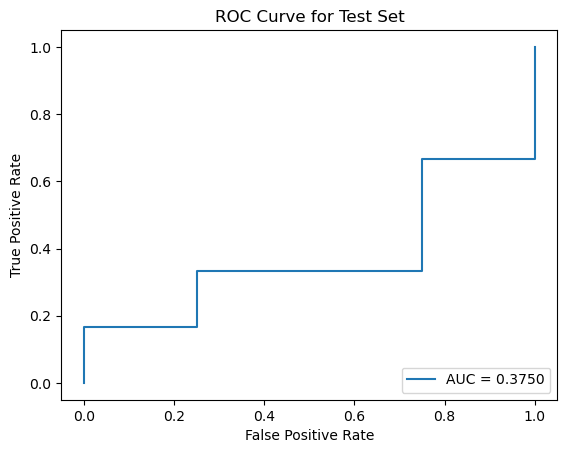

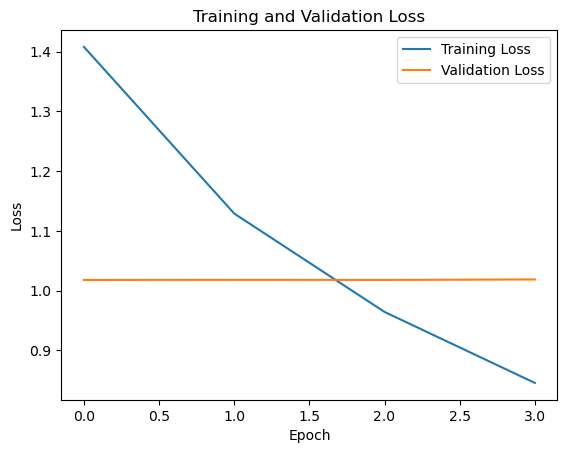

In [63]:
# Import necessary libraries
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Function to compute various evaluation metrics
def compute_evaluation_metrics(y_true, y_pred_prob):
    # Convert probabilities to binary predictions using a threshold (e.g., 0.5)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    # Calculate various evaluation metrics
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_prob)
    accuracy = accuracy_score(y_true, y_pred)
    
    # Print the evaluation metrics
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    
    return f1, precision, recall, auc, accuracy

# Compute evaluation metrics for the test set
print("\nTest Set Evaluation Metrics:")
y_test_prob = best_model.predict(X_test)
f1, precision, recall, auc, accuracy = compute_evaluation_metrics(y_test, y_test_prob)

# Compute evaluation metrics for the validation set
print("\nValidation Set Evaluation Metrics:")
y_val_prob = best_model.predict(X_val)
compute_evaluation_metrics(y_val, y_val_prob)

# Plot ROC curve for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend(loc='lower right')
plt.show()

# Plot loss curves for validation and test sets
def plot_loss(history):
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Assuming you have a history object from model training
plot_loss(history)


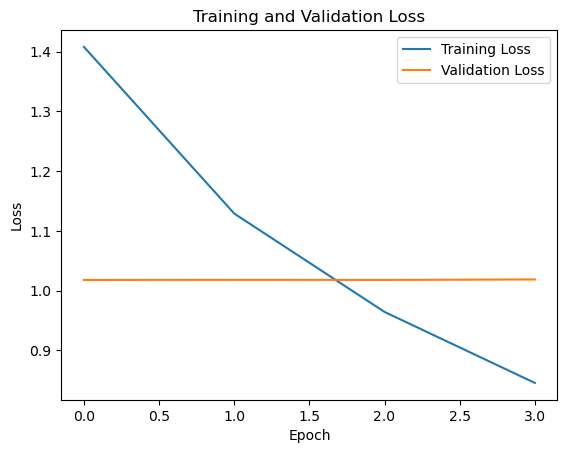

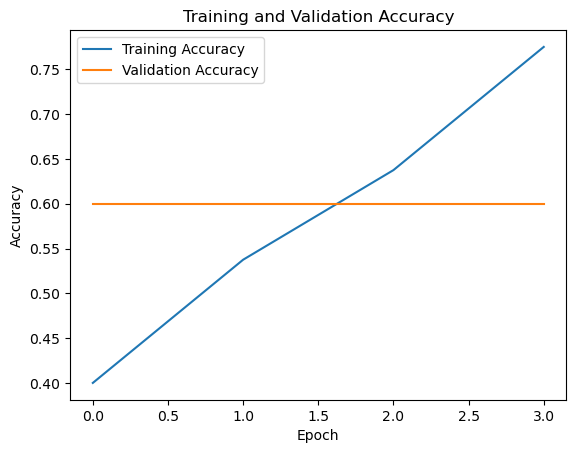

In [69]:
import matplotlib.pyplot as plt

# Function to plot training and validation loss and accuracy
def plot_metrics(history):
    # Plotting loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Plotting accuracy
    plt.figure()
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Assuming you have a history object from model training
plot_metrics(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


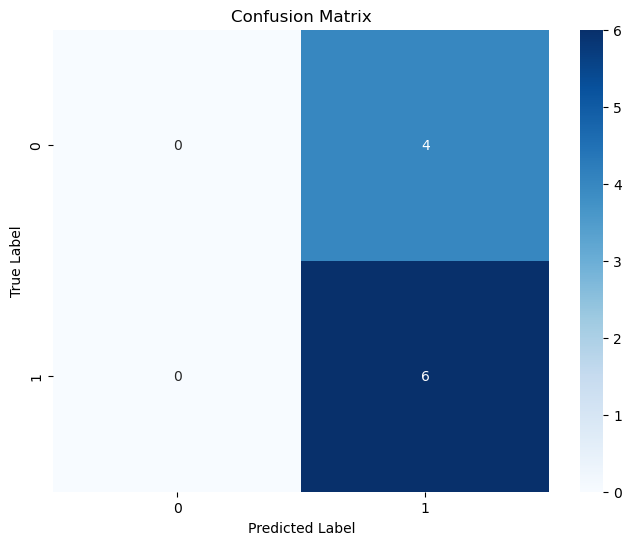

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels=None):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    # Create a heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming you have the test set predictions and the corresponding true labels
# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_test_prob = best_model.predict(X_test)
y_pred = (y_test_prob > 0.5).astype(int)

# Assuming y_test contains the true labels for the test set
# Plot confusion matrix for the test set
plot_confusion_matrix(y_test, y_pred, labels=[0, 1])


In [67]:
from sklearn.metrics import confusion_matrix

def compute_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)  # True positive rate
    specificity = tn / (tn + fp)  # True negative rate
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    return sensitivity, specificity

# Calculate sensitivity and specificity for the test set
print("\nTest Set Sensitivity and Specificity:")
y_test_pred = (y_test_prob > 0.5).astype(int)
compute_sensitivity_specificity(y_test, y_test_pred)

# Calculate sensitivity and specificity for the validation set
print("\nValidation Set Sensitivity and Specificity:")
y_val_pred = (y_val_prob > 0.5).astype(int)
compute_sensitivity_specificity(y_val, y_val_pred)



Test Set Sensitivity and Specificity:
Sensitivity (Recall): 1.0000
Specificity: 0.0000

Validation Set Sensitivity and Specificity:
Sensitivity (Recall): 1.0000
Specificity: 0.0000


(1.0, 0.0)

In [ ]:
'''The results you are observing suggest that your model's predictions are biased toward predicting only one class 
(positive in this case) for both the test and validation sets. This is evident from the perfect recall (sensitivity) 
of 1.0, meaning the model is identifying all actual positive cases correctly, but a specificity of 0.0, indicating the 
model is not identifying any true negative cases correctly.

Similarly, the Cohen's kappa of 0.0 indicates that there is no agreement between the model's predictions and the actual 
labels beyond what would be expected by chance. This is consistent with a model that is biased toward one class.'''

In [62]:
# Import necessary libraries
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Define a function to compute various evaluation metrics
def compute_evaluation_metrics(y_true, y_pred_prob):
    # Convert probabilities to binary predictions using a threshold (e.g., 0.5)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    # Calculate evaluation metrics
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    
    # Print evaluation metrics
    print(f"F1 score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    
    return f1, precision, recall, accuracy

# Calculate evaluation metrics for the test set
print("\nTest Set Evaluation Metrics:")
y_test_prob = best_model.predict(X_test)
compute_evaluation_metrics(y_test, y_test_prob)

# Calculate evaluation metrics for the validation set
print("\nValidation Set Evaluation Metrics:")
y_val_prob = best_model.predict(X_val)
compute_evaluation_metrics(y_val, y_val_prob)



Test Set Evaluation Metrics:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
F1 score: 0.7500
Precision: 0.6000
Recall: 1.0000
Accuracy: 0.6000

Validation Set Evaluation Metrics:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
F1 score: 0.7500
Precision: 0.6000
Recall: 1.0000
Accuracy: 0.6000


(0.7499999999999999, 0.6, 1.0, 0.6)

In [ ]:
# Focus on techniques like data augmentation, regularization, and early stopping to improve model generalizability.
# Train different models with varying architectures or hyperparameters and compare their performance on the test set. 
# This can help identify if the current model is overfitting or simply performs well on this specific data.

Early stopping is a regularization technique used in machine learning to prevent overfitting during model training.  Overfitting happens when a model memorizes the training data too well, leading to poor performance on unseen data.

Here's how early stopping works:

1. **Training and Validation Sets:**  You split your data into training and validation sets. The training set is used to train the model, and the validation set is used to monitor its performance during training.
2. **Monitoring Model Performance:** During training, a metric like validation loss (how well the model performs on the validation set) is tracked for each epoch (training iteration).
3. **Stopping Criteria:** You define a "patience" value, which is the number of epochs to wait for improvement in the validation metric before stopping.
4. **Early Termination:** If the validation metric doesn't improve (e.g., validation loss doesn't decrease) for the specified number of epochs (patience), early stopping kicks in and terminates the training process.

**Benefits of Early Stopping:**

- **Prevents Overfitting:** By stopping training when the model starts to overfit the training data, early stopping helps improve the model's ability to generalize to unseen data.
- **Reduces Training Time:**  Early stopping can significantly reduce training time by halting the process once the model reaches its peak performance on the validation set.

**Implementing Early Stopping:**

Most deep learning libraries like TensorFlow Keras provide built-in functions for early stopping. Here's an example using `EarlyStopping` from Keras:

```python
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping as a callback
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])
```

In this example:

- `monitor='val_loss'`: We monitor the validation loss.
- `patience=3`: If the validation loss doesn't improve for 3 consecutive epochs, early stopping will terminate training.

**Choosing Patience:**

The optimal value for "patience" depends on your specific dataset and model complexity. Here are some general guidelines:

- **Start with a small value (e.g., 3 or 5):** This allows the model to learn sufficiently before stopping.
- **Experiment with different values:**  Increase or decrease patience based on how the validation loss behaves during training.

By incorporating early stopping, you can help your model achieve better generalization performance and avoid overfitting.

In [ ]:
## unet ALGORITHM

In [75]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the U-Net model
def create_unet_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    
    # Contracting path (Encoder)
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D((2, 2))(conv1)
    
    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D((2, 2))(conv2)
    
    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D((2, 2))(conv3)
    
    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = layers.MaxPooling2D((2, 2))(conv4)
    
    # Bottleneck
    conv5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(conv5)
    
    # Expanding path (Decoder)
    up6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv5)
    merge6 = layers.Concatenate()([up6, conv4])
    conv6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(merge6)
    conv6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)
    
    up7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
    merge7 = layers.Concatenate()([up7, conv3])
    conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(merge7)
    conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)
    
    up8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
    merge8 = layers.Concatenate()([up8, conv2])
    conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(merge8)
    conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)
    
    up9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
    merge9 = layers.Concatenate()([up9, conv1])
    conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(merge9)
    conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)
    
    # Output layer
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv9)
    
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Sample usage
if __name__ == '__main__':
    # Define the input shape of the model (e.g., 240x240 with 1 channel for grayscale images)
    input_shape = (240, 240, 1)
    
    # Create the U-Net model
    unet_model = create_unet_model(input_shape)
    
    # Compile the model
    unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Print the model summary
    unet_model.summary()
    
    # Note: Replace these with your data loading and training code
    # Example data loading and training process:
    # X_train, y_train, X_val, y_val = your_data_loading_function()
    
    # Train the modelB
    # unet_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)


Model: "functional_693"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_79      │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_168 (Conv2D) │ (None, 240, 240,  │        640 │ input_layer_79[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_169 (Conv2D) │ (None, 240, 240,  │     36,928 │ conv2d_168[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_153   │ (None, 120, 120,  │          0 │ conv2d_169[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_170 (Conv2D) │ (None, 120, 120,  │     73,856 │ max_pooling2d_15… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_171 (Conv2D) │ (None, 120, 120,  │    147,584 │ conv2d_170[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_154   │ (None, 60, 60,    │          0 │ conv2d_171[0][0]  │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_172 (Conv2D) │ (None, 60, 60,    │    295,168 │ max_pooling2d_15… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_173 (Conv2D) │ (None, 60, 60,    │    590,080 │ conv2d_172[0][0]  │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_155   │ (None, 30, 30,    │          0 │ conv2d_173[0][0]  │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_174 (Conv2D) │ (None, 30, 30,    │  1,180,160 │ max_pooling2d_15… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_175 (Conv2D) │ (None, 30, 30,    │  2,359,808 │ conv2d_174[0][0]  │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_156   │ (None, 15, 15,    │          0 │ conv2d_175[0][0]  │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_176 (Conv2D) │ (None, 15, 15,    │  4,719,616 │ max_pooling2d_15… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_177 (Conv2D) │ (None, 15, 15,    │  9,438,208 │ conv2d_176[0][0]  │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_4  │ (None, 30, 30,    │  2,097,664 │ conv2d_177[0][0]  │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 30, 30,    │          0 │ conv2d_transpose

 Total params: 31,030,593 (118.37 MB)

 Trainable params: 31,030,593 (118.37 MB)

 Non-trainable params: 0 (0.00 B)

 # THANK YOU